# Collocations with Other Clause Arguments

In [1]:
from scripts.imports import *
out = Exporter(paths['outdir'], 'aspect')

# NB: here we will restrict clauses to those not headed by wayehi;
# these are dependent clauses where the verb does not act as a verb (Harmelink2011:275)
df_wayehi = df_sg[(df_sg.verb_text == 'יהי') & (df_sg.verbform == 'wayq')]
df_cl = df_sg[~df_sg.index.isin(df_wayehi.index)]

In [2]:
print(df.shape)
print(df_sg.shape)
print(df_cl.shape)

(3648, 63)
(2575, 63)
(2450, 63)


In [3]:
df.head()

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,R>CJT/,ראשׁית,תישאר,NOUN,\texthebrew{ראשית},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427693,Genesis 2:5,Genesis,Genesis,Law,SBH,VRM/,טרם,םרט,PREP,\texthebrew{טרם},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427694,Genesis 2:5,Genesis,Genesis,Law,SBH,VRM/,טרם,םרט,PREP,\texthebrew{טרם},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_sg.head()

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,R>CJT/,ראשׁית,תישאר,NOUN,\texthebrew{ראשית},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427805,Genesis 3:8,Genesis,Genesis,Law,SBH,RWX/,רוח,חור,NOUN,\texthebrew{רוח},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427835,Genesis 3:14,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_sg.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'verb', 'verbform', 'verb_stem', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'clause', 'sentence', 'cl_rela', 'cl_type', 'domain', 'genre', 'gendom',
       'cl_kind', 'verbtense', 'clargs', 'has_objc', 'has_cmpl', 'has_oc',
       'vt_order', 'PP', 'front_etcbc', 'front', 'unmodified', 'APPO', 'DEF',
       'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON',
       'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1',
       'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

## Clause Rela Survey

In [44]:
rela_ct = df_sg.pivot_table(
    index='quality',
    columns='cl_rela',
    aggfunc='size',
    fill_value=0
)

rela_ct = rela_ct.loc[rela_ct.sum(1).sort_values(ascending=False).index]
rela_ct = rela_ct[rela_ct.sum(0).sort_values(ascending=False).index]

out.table(
    rela_ct,
    'rela_ct',
    caption="Clause Relation Counts by Time Quality"
)

rela_ct

cl_rela,Main,SubAdv,SubMod,SubArg
quality,,,,
location,1103,119,98,30
duration,753,115,27,15
sequence,128,13,6,2
iteration,34,1,0,0


In [45]:
rela_pr = rela_ct.div(rela_ct.sum(1), 0)

rela_pr = rela_pr.round(2)

out.table(
    rela_pr,
    'rela_pr',
    caption="Clause Relation Proportions by Time Quality"
)

rela_pr

cl_rela,Main,SubAdv,SubMod,SubArg
quality,,,,
location,0.82,0.09,0.07,0.02
duration,0.83,0.13,0.03,0.02
sequence,0.86,0.09,0.04,0.01
iteration,0.97,0.03,0.00,0.00


In [46]:
rela_prwhole = rela_ct.div(rela_ct.sum().sum(), 0)

rela_prwhole = rela_prwhole.round(2)

out.table(
    rela_prwhole,
    'rela_prwhole',
    caption="Clause Relation Proportions by Time Quality (out of all)"
)

rela_prwhole

cl_rela,Main,SubAdv,SubMod,SubArg
quality,,,,
location,0.45,0.05,0.04,0.01
duration,0.31,0.05,0.01,0.01
sequence,0.05,0.01,0.00,0.00
iteration,0.01,0.00,0.00,0.00


## Clause Type

In [47]:
type_ct = df_sg.pivot_table(
    index='quality',
    columns=['cl_rela', 'cl_type'],
    aggfunc='size',
    fill_value=0
)

type_ct = type_ct.T

# drop non-main clauses
type_ct = type_ct.loc[idx['Main', :], :].droplevel(0, axis=0)

type_ct = type_ct.loc[type_ct.sum(1).sort_values(ascending=False).index]
type_ct = type_ct[type_ct.sum(0).sort_values(ascending=False).index]

type_ct

quality,location,duration,sequence,iteration
cl_type,,,,
Way0,168,100,49,1
WayX,121,77,16,1
xYq0,100,102,9,3
WQt0,92,75,1,3
NmCl,71,37,3,4
xQtX,67,11,17,0
WxY0,53,26,6,3
xYqX,54,26,1,1
xQt0,40,37,3,0


In [48]:
out.table(
    type_ct.head(25),
    'type_ct',
    caption="Clause Type Counts by Time Quality (Top 25)"
)

## Word Order

In [50]:
df_sg.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'verb', 'verbform', 'verb_stem', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'clause', 'sentence', 'cl_rela', 'cl_type', 'domain', 'genre', 'gendom',
       'cl_kind', 'verbtense', 'clargs', 'has_objc', 'has_cmpl', 'has_oc',
       'vt_order', 'PP', 'front_etcbc', 'front', 'unmodified', 'APPO', 'DEF',
       'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON',
       'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1',
       'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [59]:
order_ct = df_sg.pivot_table(
    index='quality',
    columns='vt_order',
    aggfunc='size',
    fill_value=0
)

order_ct = order_ct.loc[order_ct.sum(1).sort_values(ascending=False).index]
order_ct = order_ct[order_ct.sum(0).sort_values(ascending=False).index]

order_ct

vt_order,VT,TV,T,TTV,TVT,VTT
quality,,,,,,
location,797,324,104,2,0,0
duration,557,201,65,0,1,1
sequence,84,48,7,0,0,0
iteration,22,2,2,0,0,0


In [60]:
order_ct2 = order_ct.drop(['TTV', 'TVT', 'VTT'], axis=1)

out.table(
    order_ct2,
    'order_ct',
    caption='Frequencies of Word Orders',
)
    
order_ct2

vt_order,VT,TV,T
quality,,,
location,797,324,104
duration,557,201,65
sequence,84,48,7
iteration,22,2,2


In [61]:
order_pr = order_ct2 / order_ct2.sum().sum()

order_pr = order_pr.round(2)

out.table(
    order_pr,
    'order_pr',
    caption='Propotions of Word Orders (out of total)',
)
    
order_pr

vt_order,VT,TV,T
quality,,,
location,0.36,0.15,0.05
duration,0.25,0.09,0.03
sequence,0.04,0.02,0.00
iteration,0.01,0.00,0.00


In [67]:
order_dp = sig.apply_deltaP(order_ct2, 0, 1)

order_dp = order_dp.round(2)

out.table(
    order_dp,
    'order_dp',
    caption='ΔP of Word Orders (out of total)',
)
    
order_dp

vt_order,VT,TV,T
quality,,,
location,-0.02,0.01,0.01
duration,0.03,-0.02,-0.00
sequence,-0.06,0.09,-0.03
iteration,0.19,-0.19,-0.00


In [68]:
order_dp2 = sig.apply_deltaP(order_ct2.T, 0, 1)

order_dp2 = order_dp2.round(2)

out.table(
    order_dp2,
    'order_dp2',
    caption='ΔP of Word Orders (out of total)',
)
    
order_dp2

quality,location,duration,sequence,iteration
vt_order,,,,
VT,-0.02,0.03,-0.02,0.01
TV,0.01,-0.03,0.03,-0.01
T,0.03,-0.01,-0.03,-0.00


In [69]:
order_fs, order_odds = sig.apply_fishers(order_ct2, 0, 1)

order_fs = order_fs.round(2)

out.table(
    order_fs,
    'order_fs',
    caption='ΔP of Word Orders (out of total)',
)
    
order_fs

,VT,TV,T
location,-0.49,0.23,0.36
duration,0.71,-0.68,-0.06
sequence,-0.78,1.67,-0.70
iteration,1.23,-1.40,0.00


## Objects

In [38]:
objc_ct = df_cl.pivot_table(
    index='quality',
    columns='has_objc',
    aggfunc='size',
    fill_value=0
)

objc_ct

has_objc,0.0,1.0
quality,,
duration,564,252
iteration,9,16
location,735,425
sequence,63,32


In [39]:
objc_pr = objc_ct.div(objc_ct.sum(1), 0)

objc_pr

has_objc,0.0,1.0
quality,,
duration,0.691176,0.308824
iteration,0.360000,0.640000
location,0.633621,0.366379
sequence,0.663158,0.336842


In [40]:
objc_dp = sig.apply_deltaP(objc_ct, 0, 1)
objc_fs, objc_odds = sig.apply_fishers(objc_ct, 0, 1, logtransform=False)

objc_dp

has_objc,0.0,1.0
quality,,
duration,0.060708,-0.060708
iteration,-0.297653,0.297653
location,-0.045866,0.045866
sequence,0.009485,-0.009485


In [41]:
objc_fs

,0.0,1.0
duration,0.004711,-0.004711
iteration,-0.002752,0.002752
location,-0.029955,0.029955
sequence,0.912320,-0.912320


## Examples of durative with object

In [42]:
df_cl[
    (df_cl.quality == 'duration')
    & (df_cl.has_objc == 1)
][['verse', 'clause', 'function', 'verb_utf8']].head(100)

,verse,clause,function,verb_utf8
node,,,,
427835,Genesis 3:14,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,atelic_ext,אכל
427851,Genesis 3:17,בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...,atelic_ext,אכל
428651,Genesis 14:4,שְׁתֵּ֤ים עֶשְׂרֵה֙ שָׁנָ֔ה עָבְד֖וּ אֶת־כְּדָ...,atelic_ext,עבד
428781,Genesis 15:13,וְעִנּ֣וּ אֹתָ֑ם אַרְבַּ֥ע מֵאֹ֖ות שָׁנָֽה׃,atelic_ext,ענה
430615,Genesis 29:18,אֶֽעֱבָדְךָ֙ שֶׁ֣בַע שָׁנִ֔ים בְּרָחֵ֥ל בִּתְּ...,atelic_ext,עבד
431024,Genesis 31:41,עֲבַדְתִּ֜יךָ אַרְבַּֽע־עֶשְׂרֵ֤ה שָׁנָה֙ בִּש...,atelic_ext,עבד
431215,Genesis 32:33,עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶ...,anterior_dur,אכל
431279,Genesis 33:13,וּדְפָקוּם֙ יֹ֣ום אֶחָ֔ד,atelic_ext,דפק
432418,Genesis 42:17,וַיֶּאֱסֹ֥ף אֹתָ֛ם אֶל־מִשְׁמָ֖ר שְׁלֹ֥שֶׁת יָ...,atelic_ext,אסף


## Complement

In [43]:
cmpl_ct = df_cl.pivot_table(
    index='quality',
    columns='has_cmpl',
    aggfunc='size',
    fill_value=0
)

cmpl_ct

has_cmpl,0.0,1.0
quality,,
duration,489,327
iteration,16,9
location,713,447
sequence,70,25


In [44]:
cmpl_pr = cmpl_ct.div(cmpl_ct.sum(1), 0)

cmpl_pr

has_cmpl,0.0,1.0
quality,,
duration,0.599265,0.400735
iteration,0.640000,0.360000
location,0.614655,0.385345
sequence,0.736842,0.263158


In [45]:
cmpl_dp = sig.apply_deltaP(cmpl_ct, 0, 1)
cmpl_fs, cmpl_odds = sig.apply_fishers(cmpl_ct, 0, 1, logtransform=False)

cmpl_dp

has_cmpl,0.0,1.0
quality,,
duration,-0.024954,0.024954
iteration,0.025804,-0.025804
location,0.000339,-0.000339
sequence,0.128146,-0.128146


In [46]:
cmpl_fs

,0.0,1.0
duration,-0.269387,0.269387
iteration,0.839662,-0.839662
location,1.000000,-1.000000
sequence,0.012835,-0.012835


## Examples of durative with complements

In [47]:
df_cl[
    (df_cl.quality == 'duration')
    & (df_cl.has_cmpl == 1)
][['verse', 'clause', 'function', 'verb_utf8']]

,verse,clause,function,verb_utf8
node,,,,
428030,Genesis 5:22,וַיִּתְהַלֵּ֨ךְ חֲנֹ֜וךְ אֶת־הָֽאֱלֹהִ֗ים שְׁל...,atelic_ext,הלך
428066,Genesis 6:3,לֹֽא־יָדֹ֨ון רוּחִ֤י בָֽאָדָם֙ לְעֹלָ֔ם,anterior_dur,דון
429481,Genesis 21:34,וַיָּ֧גָר אַבְרָהָ֛ם בְּאֶ֥רֶץ פְּלִשְׁתִּ֖ים ...,atelic_ext,גור
430433,Genesis 27:44,וְיָשַׁבְתָּ֥ עִמֹּ֖ו יָמִ֣ים אֲחָדִ֑ים,atelic_ext,ישׁב
430602,Genesis 29:14,וַיֵּ֥שֶׁב עִמֹּ֖ו חֹ֥דֶשׁ יָמִֽים׃,atelic_ext,ישׁב
...,...,...,...,...
515487,2_Chronicles 34:33,כָּל־יָמָ֕יו לֹ֣א סָ֔רוּ מֵֽאַחֲרֵ֕י יְהוָ֖ה א...,atelic_ext,סור
515582,2_Chronicles 35:25,וַיֹּאמְר֣וּ כָֽל־הַשָּׁרִ֣ים׀ וְ֠הַשָּׁרֹות ב...,anterior_dur,אמר
515592,2_Chronicles 36:2,וּשְׁלֹשָׁ֣ה חֳדָשִׁ֔ים מָלַ֖ךְ בִּירוּשָׁלִָֽם׃,atelic_ext,מלך


## Complement / Object

In [48]:
oc_ct = df_cl.pivot_table(
    index='quality',
    columns='has_oc',
    aggfunc='size',
    fill_value=0
)

oc_ct

has_oc,0.0,1.0
quality,,
duration,316,500
iteration,4,21
location,424,736
sequence,46,49


In [49]:
oc_pr = oc_ct.div(oc_ct.sum(1), 0)

oc_pr

has_oc,0.0,1.0
quality,,
duration,0.387255,0.612745
iteration,0.160000,0.840000
location,0.365517,0.634483
sequence,0.484211,0.515789


In [50]:
oc_dp = sig.apply_deltaP(oc_ct, 0, 1)
oc_fs, oc_odds = sig.apply_fishers(oc_ct, 0, 1, logtransform=False)

oc_dp

has_oc,0.0,1.0
quality,,
duration,0.016942,-0.016942
iteration,-0.219527,0.219527
location,-0.025508,0.025508
sequence,0.112396,-0.112396


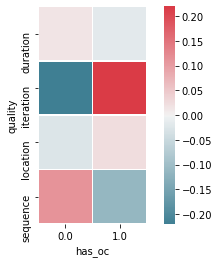

In [51]:
heatmap(oc_dp, center=0)

In [52]:
oc_fs.round(2)

,0.0,1.0
duration,0.46,-0.46
iteration,-0.02,0.02
location,-0.24,0.24
sequence,0.03,-0.03
